In [1]:
'''CISC 451 Project'''

# Pre Process
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('news_dataset.csv')
data = data.dropna()
data.content = data.content.str.lower()

data.content = data.content.str.replace('[^a-zA-Z0-9 ]', '')

data = data[data.content != ' ']

stop = stopwords.words('english')
data['content'].apply(lambda x: [item for item in x if item not in stop])
data.to_csv('clean_data.csv', index=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [2]:
import statistics
#Data Exploration
def get_data():
    data = pd.read_csv('clean_data.csv')
    data.dropna(inplace=True)
    return data

def information(df):
    unique = df['publication'].unique()
    #print(df)
    print(len(unique))
    print(unique)
    print(df.groupby('publication').count())

def length_title(df):
    title = df.title
    total = []
    for i in title:
        x  = len(i.split())
        total.append(x)
    return statistics.mean(total)

def length_content(df):
    title = df.content
    total = []
    for i in title:
        x  = len(i.split())
        total.append(x)
    return statistics.mean(total)

df = get_data()
real_data = df.loc[df.label == 'real']
fake_data = df.loc[df.label == 'fake']

print('lenght of real data',len(real_data.index))
print('lenght of fake data',len(fake_data.index))

print('news source for real data:')
information(real_data)
print('news source for fake data:')
information(fake_data)
        
print('average title length of real data', length_title(real_data))
print('average title length of fake data', length_title(fake_data))

print('average content length of real data',  length_content(real_data))
print('average content length of fake data', length_content(fake_data))

lenght of real data 15712
lenght of fake data 12166
news source for real data:
10
['New York Times' 'CNN' 'Atlantic' 'Fox News' 'National Review' 'Guardian'
 'NPR' 'Reuters' 'Vox' 'Washington Post']
                 Unnamed: 0  title  content  label
publication                                       
Atlantic               1558   1558     1558   1558
CNN                    1624   1624     1624   1624
Fox News               1132   1132     1132   1132
Guardian               1880   1880     1880   1880
NPR                    2014   2014     2014   2014
National Review         973    973      973    973
New York Times         1428   1428     1428   1428
Reuters                2307   2307     2307   2307
Vox                     910    910      910    910
Washington Post        1886   1886     1886   1886
news source for fake data:
240
['100percentfedup' '21stcenturywire' 'abcnews' 'abeldanger'
 'abovetopsecret' 'activistpost' 'addictinginfo' 'adobochronicles'
 'ahtribune' 'allnewspipeline' 

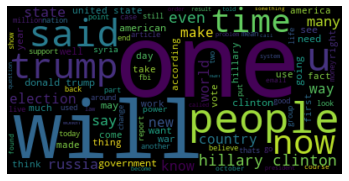

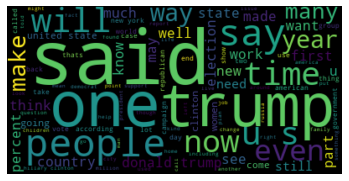

In [7]:
# Wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data = pd.read_csv('clean_data.csv')
data.dropna(inplace=True)

Real = data.loc[data['label'] == 'real']
Fake = data.loc[data['label'] == 'fake']
text = " ".join(c for c in Fake.content)

wordcloud = WordCloud(max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

text = " ".join(c for c in Real.content)

wordcloud = WordCloud(max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


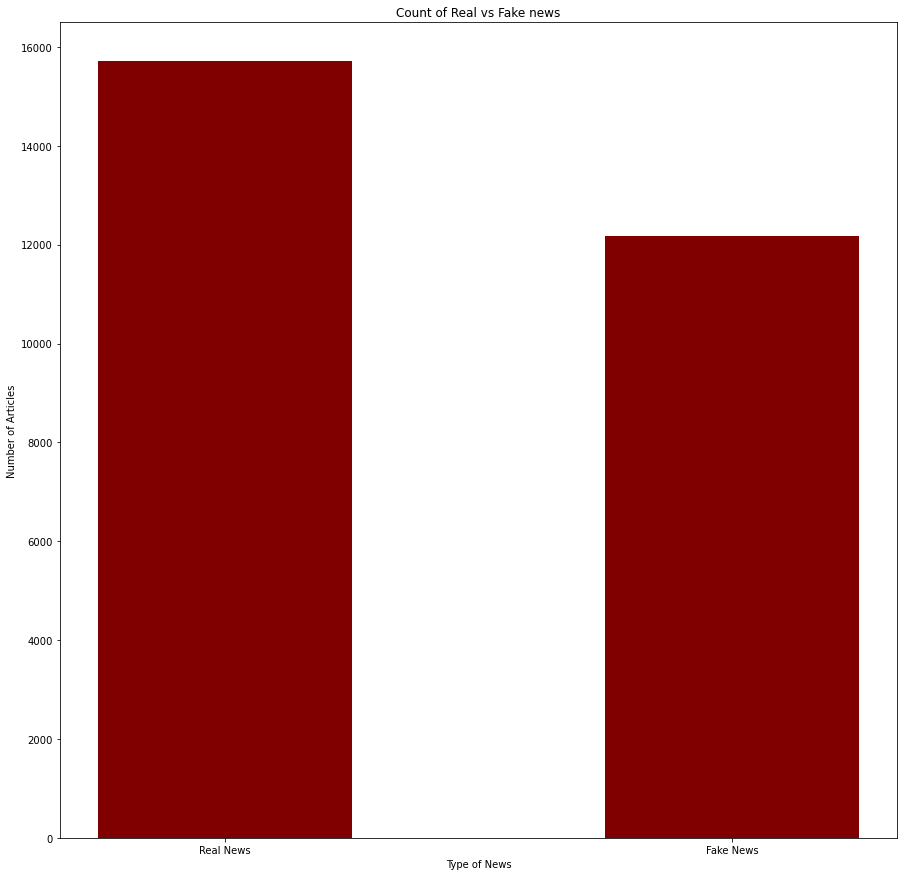

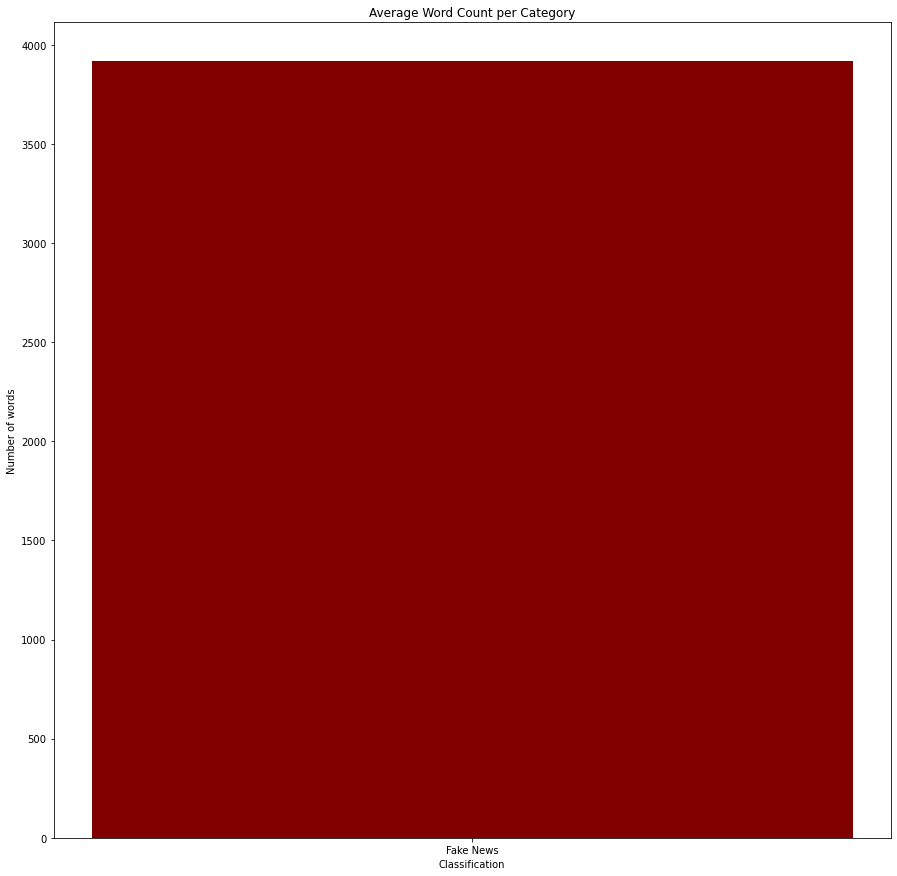

In [8]:
# Visuals
data = pd.read_csv('clean_data.csv')
data.dropna(inplace=True)
# Plot total number of each class
fake = data.loc[data['label'] == 'fake']
real = data.loc[data['label'] == 'real']
real = len(real)
fake = len(fake)
count = [real,fake]
label = ['Real News','Fake News']
fig = plt.figure(figsize=(15,15))
plt.bar(label,count,color='maroon',width=0.5)
plt.xlabel("Type of News") 
plt.ylabel("Number of Articles") 
plt.title("Count of Real vs Fake news") 
plt.show()



In [11]:
# Baseline Models
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def tfidf(data):
    vec = TfidfVectorizer(use_idf=True)
    temp = vec.fit_transform(data['content'])
    dictionary = vec.get_feature_names()
    return temp,data['label'],dictionary

def logReg(X_train,X_test,y_train,y_test):
    model = LogisticRegression(max_iter=400, n_jobs = -1)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("LogReg matrix:",metrics.confusion_matrix(y_test,pred))
    
def RF(X_train,X_test,y_train,y_test):
    model = RandomForestClassifier(n_jobs = -1)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("Random Forest matrix:",metrics.confusion_matrix(y_test,pred))
    
def svm(X_train,X_test,y_train,y_test):
    model = SVC(gamma='scale')
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("svm matrix:",metrics.confusion_matrix(y_test,pred))
    
if __name__ =='__main__':
    df = get_data()
    df=  df.drop('publication', axis=1)
    X, y, dictionary = tfidf(df)
    X_train, X_test,y_train,y_test = train_test_split(X,y,shuffle = True)
    logReg(X_train,X_test,y_train,y_test)
    svm(X_train,X_test,y_train,y_test)
    RF(X_train,X_test,y_train,y_test)

LogReg matrix: [[2718  313]
 [ 240 3699]]


In [ ]:
#random search to find the best parameters
from sklearn.model_selection import RandomizedSearchCV
import time

#log reg grid search
C = np.logspace(0, 4, 10)
grid_param = {'C': C, 'solver': ['liblinear','saga','newton-cg']}
start = time.time()
logreg= LogisticRegression(n_jobs = -1)
log_reg_rand = RandomizedSearchCV(logreg, grid_param, cv=10, n_jobs =-1)
log_reg_rand.fit(X,y)
print('Best parameter:', log_reg_rand.best_params_, "Best performance:", log_reg_rand.best_score_)
print("The running time was", time.time() - start)

#svm randomsearch took ungodly long and barely improved the performance so we left it out in the code

#random forest random search 
grid_param = {'max_features': ['auto','sqrt','log2'],
               'n_estimators': [50,100,150,200]}

start = time.time()
RF= RandomForestClassifier(n_jobs= -1)
rf_grid = RandomizedSearchCV(RF, grid_param, cv=10, n_jobs = -1) 
rf_grid.fit(X,y)
print('Best parameter:', rf_grid.best_params_, "Best performance:", rf_grid.best_score_)
print("The running time was", time.time() - start)

In [ ]:
# Stacked Baselines
from sklearn.ensemble import StackingClassifier

if __name__ =='__main__':
    df = get_data()
    df=  df.drop('publication', axis=1)
    X, y, dictionary = tfidf(df)

    estimators = [('rf', RandomForestClassifier(n_jobs = -1, n_estimators = 150, max_features = 'auto', )),
                  ('log' ,LogisticRegression(n_jobs = -1, C= 166, solver= 'liblinear')),
                  ('svc' ,SVC(gamma='scale'))]

    clf = StackingClassifier(estimators=estimators, final_estimator= RandomForestClassifier(n_jobs = -1))
    
    X_train, X_test,y_train,y_test = train_test_split(X,y,shuffle = True)
    clf.fit(X_train, y_train)
   
    print(clf.score(X_test,y_test))

